In [ ]:
!pip install tensorflow

import numpy as np
import cv2, pickle
from sklearn.model_selection import train_test_split
import keras
from PIL import Image

from keras.models import Sequential
#from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
#from tensorflow.keras.optimizers import RMSprop as LegacyRMSprop
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D
import tensorflow as tf

import matplotlib.pyplot as plt

2023-11-17 22:16:31.108467: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 22:16:31.139435: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-17 22:16:31.139465: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-17 22:16:31.139484: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-17 22:16:31.145133: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-17 22:16:31.145610: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [ ]:
data_file = "ETL7-img/JapaneseHiragana.pickle"
im_size = 32
out_size = 46
im_color = 1
in_shape = (im_size, im_size, im_color)

In [ ]:
data = pickle.load(open(data_file, "rb"))

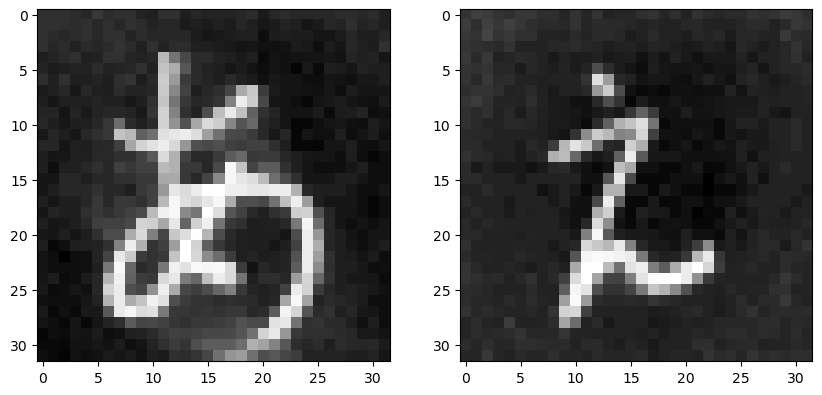

In [ ]:
#image_data = np.array(data[0][1])
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(data[0][1], cmap='gray')
axes[1].imshow(data[1324][1], cmap='gray')

In [ ]:
y = []
x = []
for d in data:
  (num, img) = d
  img = img.astype('float').reshape(im_size, im_size, im_color) / 255
  #y.append(to_categorical(num, num_classes=out_size))
  y.append(num)
  x.append(img)

In [ ]:
x = np.array(x)
y = np.array(y)

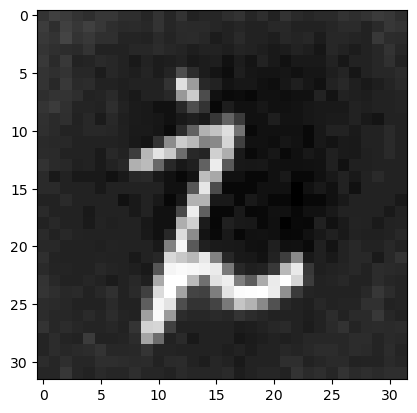

In [ ]:
check = np.squeeze(x[1324])
plt.imshow(check, cmap='gray')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=101)

### to check the model accuracy in M1chip environment

In [ ]:
np.save('x_test.npy', x_test)
np.save('y_test.npy', y_test)
x_train.shape

(12880, 32, 32, 1)

In [ ]:
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_CHANNELS = 1

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=3,
    filters=32,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=3,
    filters=64,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=46,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    #optimizer=adam_optimizer,
    optimizer= RMSprop(),
    #optimizer =LegacyRMSprop(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(histogram_freq=1)

training_history = model.fit(
    x_train,
    y_train,
    epochs=200,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/200
403/403 [==============================] - 4s 8ms/step - loss: 1.4207 - accuracy: 0.6193 - val_loss: 0.3876 - val_accuracy: 0.8981
Epoch 2/200
403/403 [==============================] - 3s 8ms/step - loss: 0.3717 - accuracy: 0.8922 - val_loss: 0.2299 - val_accuracy: 0.9255
Epoch 3/200
403/403 [==============================] - 3s 8ms/step - loss: 0.2089 - accuracy: 0.9352 - val_loss: 0.1777 - val_accuracy: 0.9491
Epoch 4/200
403/403 [==============================] - 3s 7ms/step - loss: 0.1427 - accuracy: 0.9545 - val_loss: 0.1405 - val_accuracy: 0.9606
Epoch 5/200
403/403 [==============================] - 3s 8ms/step - loss: 0.1060 - accuracy: 0.9667 - val_loss: 0.1368 - val_accuracy: 0.9602
Epoch 6/200
403/403 [==============================] - 3s 8ms/step - loss: 0.0758 - accuracy: 0.9754 - val_loss: 0.1163 - val_accuracy: 0.9655
Epoch 7/200
403/403 [==============================] - 3s 8ms/step - loss: 0.0561 - accuracy: 0.9807 - val_loss: 0.1349 - val_accuracy: 0.9646

In [ ]:
model_name = 'hiragana_recognition_cnn.h5'
model.save(model_name, save_format='h5')

/home/jj/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## develop resnet model

In [ ]:
from tensorflow.keras.utils import to_categorical
# Convert target data to one-hot encoding
y_train = to_categorical(y_train, num_classes=46)
y_test = to_categorical(y_test, num_classes=46)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
# Layer 1
model.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Layer 2
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Layer 3
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
# Layer 4
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
# Layer 5
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# Flatten
model.add(Flatten())
# Fully connected layers
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(histogram_freq=1)

training_history = model.fit(
    x_train,
    y_train,
    epochs=70,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/70
403/403 [==============================] - 72s 176ms/step - loss: 3.8290 - accuracy: 0.0234 - val_loss: 3.5649 - val_accuracy: 0.0991
Epoch 2/70
403/403 [==============================] - 71s 177ms/step - loss: 1.3247 - accuracy: 0.6023 - val_loss: 0.4909 - val_accuracy: 0.8472
Epoch 3/70
403/403 [==============================] - 71s 176ms/step - loss: 0.2442 - accuracy: 0.9314 - val_loss: 0.1875 - val_accuracy: 0.9401
Epoch 4/70
403/403 [==============================] - 71s 175ms/step - loss: 0.1267 - accuracy: 0.9647 - val_loss: 0.1539 - val_accuracy: 0.9615
Epoch 5/70
403/403 [==============================] - 71s 176ms/step - loss: 0.0975 - accuracy: 0.9741 - val_loss: 0.2318 - val_accuracy: 0.9543
Epoch 6/70
403/403 [==============================] - 71s 175ms/step - loss: 0.0788 - accuracy: 0.9780 - val_loss: 0.1396 - val_accuracy: 0.9683
Epoch 7/70
403/403 [==============================] - 70s 175ms/step - loss: 0.0699 - accuracy: 0.9832 - val_loss: 0.1385 - val_ac

In [ ]:
model_name = 'hiragana_recognition_alex.h5'
model.save(model_name, save_format='h5')

/home/jj/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_name = 'hiragana_recognition_alex.tf'
model.save(model_name, save_format='tf')

INFO:tensorflow:Assets written to: hiragana_recognition_alex.tf/assets


INFO:tensorflow:Assets written to: hiragana_recognition_alex.tf/assets
